In [23]:
# basics + plotting
import importlib
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams["figure.dpi"] = 250
plt.rcParams["font.family"] = "sans serif"

In [2]:
diagnosis_fields = [
    "131338", # date first diagnosed with I42
    "41202", # ICD10 diagnoses
    "41204", # ICD10 diagnoses
    "41270", # ICD10 diagnoses
    "20002", # self-reported conditions
]

measurement_fields = [
    "22420", # LV ejection fraction
    "22421", # LV end diastolic volume
    "22422", # LV end systolic volume
    "22423", # LV stroke volume
    "22424", # Cardiac output
    "22425", # Cardiac index
    "22426", # Average heart rate
    "22427", # Body surface area
    "24105", # LV myocardial mass
    "24157", # LV circumferential strain global
    "24181", # LV longitudinal strain global
    "24140", # LV mean myocardial wall thickness global
    "24174", # LV radial strain global
]

In [24]:
def get_fields(fields, base_dir):
    df = pd.read_csv(os.path.join(base_dir, fields[0] + '.csv'), low_memory=False)
    for f in tqdm(fields[1:]):
        df = pd.merge(left=df,
                      right=pd.read_csv(os.path.join(base_dir, f + '.csv'), low_memory=False),
                      left_on='eid', 
                      right_on='eid', 
                      how='inner')
    return df

In [25]:
df = get_fields(diagnosis_fields, "../../../../all_phenotyes_aug2022/split_phenotypes")

100%|█████████████████████████████████████████████| 4/4 [00:57<00:00, 14.31s/it]


In [31]:
df

,eid,131338-0.0,41202-0.0,41202-0.1,41202-0.2,41202-0.3,41202-0.4,41202-0.5,41202-0.6,41202-0.7,...,20002-3.24,20002-3.25,20002-3.26,20002-3.27,20002-3.28,20002-3.29,20002-3.30,20002-3.31,20002-3.32,20002-3.33
0,1000015,NaN,H258,R074,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000027,NaN,D123,I803,K635,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000039,NaN,B349,K049,M674,O342,O990,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000040,NaN,C443,K573,M169,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000053,NaN,M2331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502404,6025195,NaN,I200,I209,I251,I269,R060,R073,R074,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502405,6025207,NaN,H251,R31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502406,6025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502407,6025222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df2 = pd.read_csv("../../../../all_phenotyes_aug2022/split_phenotypes/20002.csv", low_memory=False)

In [66]:
df2

,eid,20002-0.0,20002-0.1,20002-0.2,20002-0.3,20002-0.4,20002-0.5,20002-0.6,20002-0.7,20002-0.8,...,20002-3.24,20002-3.25,20002-3.26,20002-3.27,20002-3.28,20002-3.29,20002-3.30,20002-3.31,20002-3.32,20002-3.33
0,1000015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000027,1651.0,1568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000039,1078.0,1286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000053,1111.0,1452.0,1387.0,1538.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502404,6025195,1074.0,1538.0,1398.0,1353.0,1138.0,1426.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502405,6025207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502406,6025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502407,6025222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df = pd.read_csv("../../../../all_phenotyes_aug2022/split_phenotypes/41202.csv", low_memory=False)

In [45]:
df = df.set_index('eid')

In [59]:
df = df.fillna('').sum(axis=1).to_frame(name='icd10')

In [64]:
df['icd10'].str.contains('I4').sum()

24200

In [51]:
list(filter('', ['', 'a', '']))

TypeError: 'str' object is not callable

In [47]:
df.apply(lambda row: '_'.join(filter(None, row)))

TypeError: sequence item 19: expected str instance, float found

In [14]:
pd.read_csv("../../../../all_phenotyes_aug2022/split_phenotypes/24174.csv", low_memory=False)

,eid,24174-2.0,24174-3.0
0,1000015,NaN,NaN
1,1000027,NaN,NaN
2,1000039,NaN,NaN
3,1000040,NaN,NaN
4,1000053,NaN,NaN
...,...,...,...
502404,6025195,NaN,NaN
502405,6025207,NaN,NaN
502406,6025210,NaN,NaN
502407,6025222,NaN,NaN


In [4]:
field24181 = pd.read_csv("../../../../all_phenotyes_aug2022/split_phenotypes/24181.csv", low_memory=False)

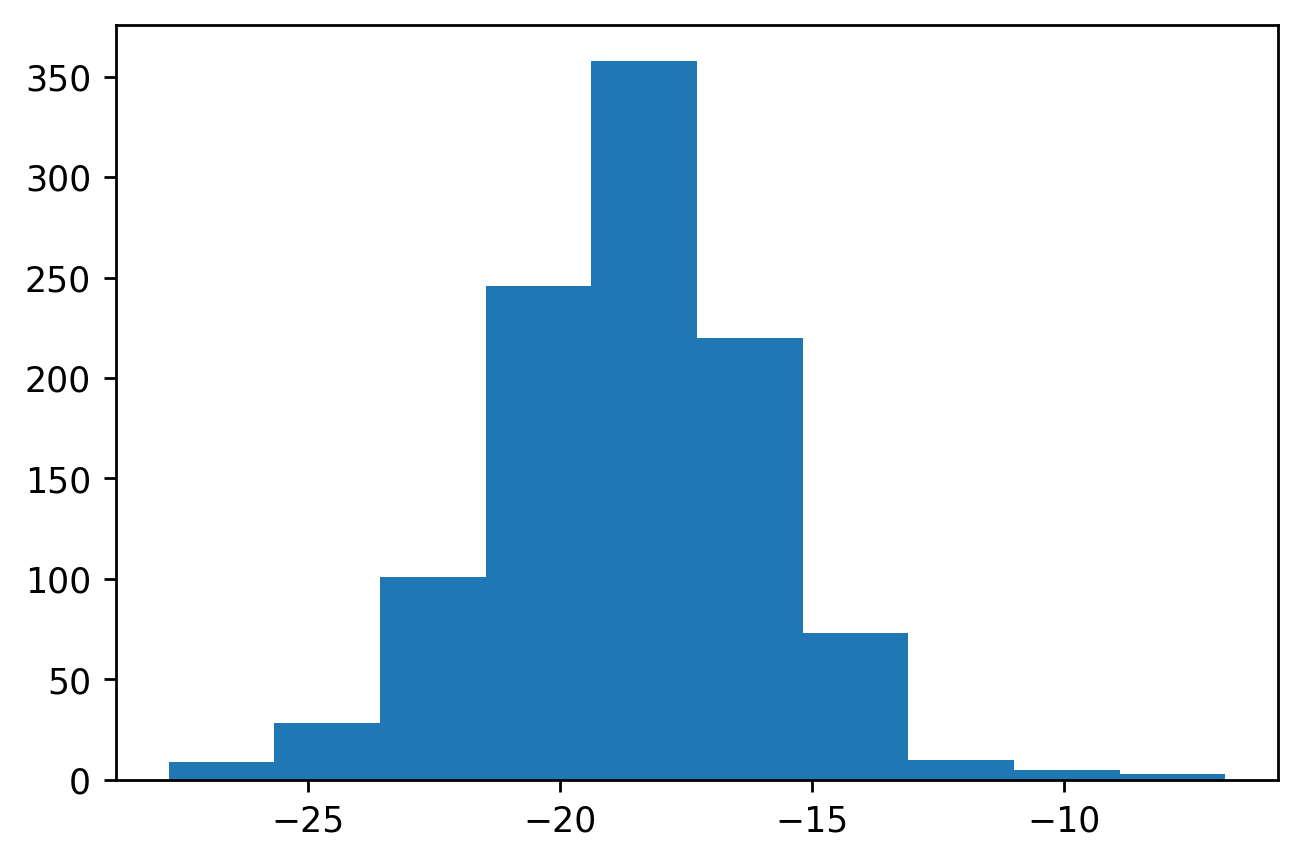

In [13]:
plt.hist(field24181['24181-2.0']);

In [9]:
(~field24181[['24181-2.0', '24181-3.0']].isna()).sum()

24181-2.0    1053
24181-3.0     912
dtype: int64

In [ ]:
phendata = pd.read_csv("../../../../all_phenotyes_aug2022/split_phenotypes/131338.csv", 
                       low_memory=False)\
            .set_index('eid')\
            .fillna(0)\
            .apply({'131338-0.0': lambda x: 1 if x!=0 else 0})\
            .astype({'131338-0.0':int})
phendata.index = phendata.index.astype(str)
phendata.to_parquet("../data/131338.parquet")